# Imports

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from movement_metrics import *

# Some functions

In [43]:
def plot_grouped_bar(data, overall_avg, title):
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.2
    x = range(len(x_labels) + 1)  
    positions = [list(map(lambda pos: pos + i * bar_width, x)) for i in range(len(group_labels))]
    extended_data = data + [[avg for avg in overall_avg]]

    for idx, group_label in enumerate(group_labels):
        group_values = [participant[idx] for participant in extended_data]
        ax.bar(positions[idx], group_values, width=bar_width, label=group_label)

    ax.set_xticks([pos + bar_width for pos in range(len(x_labels) + 1)])
    ax.set_xticklabels(x_labels + ["Overall"])
    ax.set_ylabel("DTW Distance")
    ax.set_title(title)
    ax.legend(title="Comparison Groups", loc="upper left")
    plt.tight_layout()
    plt.show()
    
def plot_grouped_bar_overall(df_melted, metric_pairs):
    df_overall = (
        df_melted.groupby(['Metric', 'Condition'])['Distance']
        .mean()
        .reset_index()
        .assign(Participant="Overall")  
    )

    df_melted_with_overall = pd.concat([df_melted, df_overall], ignore_index=True)
    fig, axs = plt.subplots(len(metric_pairs), 1, figsize=(14, 18), sharey=False)
    axs = axs.flatten()

    for i, metric in enumerate(metric_pairs):
        metric_data = df_melted_with_overall[df_melted_with_overall['Metric'] == metric]
        sns.barplot(x='Participant', y='Distance', hue='Condition', data=metric_data, ax=axs[i])
        axs[i].set_title(f'{metric}')
        axs[i].set_ylabel('Distance')
        axs[i].set_xlabel('Participant')
        axs[i].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    overall_averages = df_overall[['Metric', 'Condition', 'Distance']]
    print("Overall Averages:")
    print(overall_averages)
    

# DTW

In [3]:
df_correct = pd.read_pickle("../correct_position_scaled_df.pkl")
df_incorrect = pd.read_pickle("../incorrect_position_scaled_df.pkl")

## position data

In [4]:
print("Correct vs Correct - Repetitions:")
overall_average_reps_correct = dtw_reps_position(df_correct)

print("\nCorrect vs Incorrect - Repetitions:")
overall_average_reps_incorrect = dtw_reps_position(df_incorrect, df_correct)

Correct vs Correct - Repetitions:
Average DTW distance for Participant_A: 0.11662948997075642
Average DTW distance for Participant_B: 0.1741985645421242
Average DTW distance for Participant_C: 0.04844052401653247
Average DTW distance for Participant_D: 0.09550064541418209
Average DTW distance for Participant_E: 0.15293891267729592
Overall average DTW distance (reps): 0.11754162732417824

Correct vs Incorrect - Repetitions:
Average DTW distance for Participant_A: 0.21072428952300482
Average DTW distance for Participant_B: 0.21104999188057738
Average DTW distance for Participant_C: 0.1531710243795792
Average DTW distance for Participant_D: 0.33873497706120753
Average DTW distance for Participant_E: 0.3941984775926134
Overall average DTW distance (reps): 0.2615757520873965


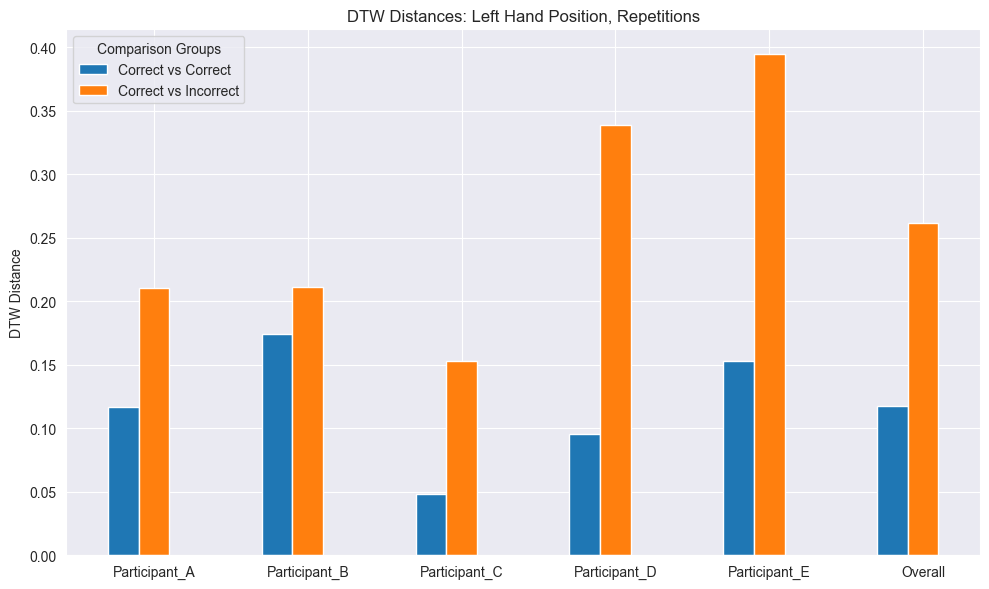

In [5]:
x_labels = ["Participant_A", "Participant_B", "Participant_C", "Participant_D", "Participant_E"]
group_labels = ["Correct vs Correct", "Correct vs Incorrect"]

reps_data = [
    [0.1166, 0.2107],  # Participant_A
    [0.1742, 0.2110],  # Participant_B
    [0.0484, 0.1532],  # Participant_C
    [0.0955, 0.3387],  # Participant_D
    [0.1529, 0.3942],  # Participant_E
]
reps_overall_avg = [0.1175, 0.2616] 
plot_grouped_bar(reps_data, reps_overall_avg, "DTW Distances: Left Hand Position, Repetitions")

## joint angle data

### elbow

In [6]:
print("Correct vs Correct - Repetitions:")
elbow_correct_dtw = dtw_reps_joint(df_correct, "Left Elbow Flexion/Extension joint_angle_xzy")

print("\nCorrect vs Incorrect - Repetitions:")
elbow_incorrect_dtw = dtw_reps_joint(df_incorrect, "Left Elbow Flexion/Extension joint_angle_xzy", df_correct)

Correct vs Correct - Repetitions:
Average DTW distance for Participant_A: 5.393038003495909
Average DTW distance for Participant_B: 6.0895480334443715
Average DTW distance for Participant_C: 6.139335350629702
Average DTW distance for Participant_D: 3.631150853199636
Average DTW distance for Participant_E: 1.7358286237552052
Overall average DTW distance (reps): 4.597780172904964

Correct vs Incorrect - Repetitions:
Average DTW distance for Participant_A: 12.753275956959301
Average DTW distance for Participant_B: 16.294388139646696
Average DTW distance for Participant_C: 33.295370210877934
Average DTW distance for Participant_D: 8.65547444099374
Average DTW distance for Participant_E: 12.513907587043905
Overall average DTW distance (reps): 16.702483267104316


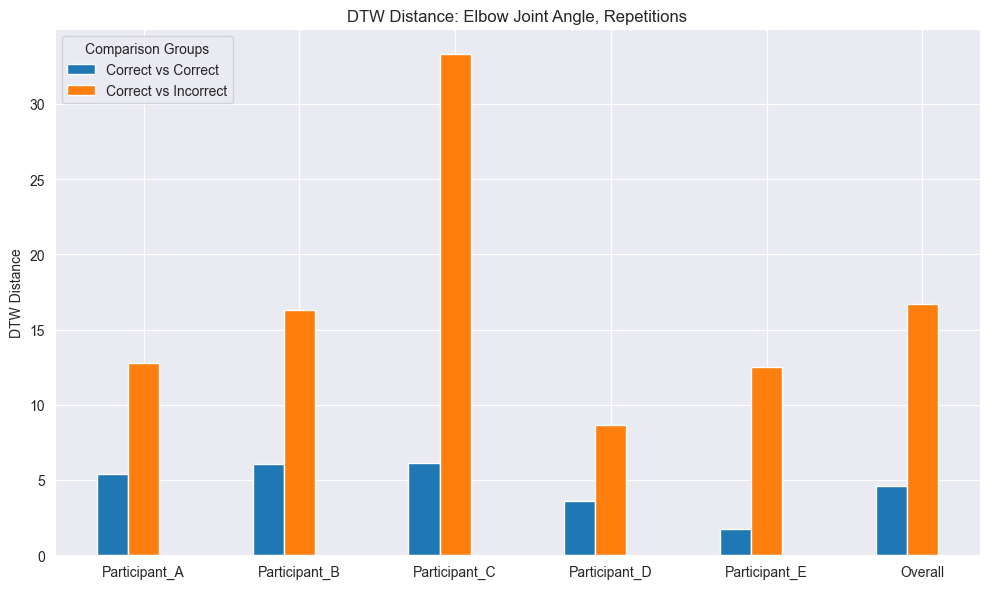

In [8]:
elbow_reps_data_1 = [
    [5.393, 12.753],  # Participant_A
    [6.090, 16.294],  # Participant_B
    [6.139, 33.295],  # Participant_C
    [3.631, 8.655],   # Participant_D
    [1.736, 12.514],  # Participant_E
]
elbow_reps_overall_avg_1 = [4.598, 16.702]  

plot_grouped_bar(
    elbow_reps_data_1, elbow_reps_overall_avg_1,
    "DTW Distance: Elbow Joint Angle, Repetitions"
)

### shoulder

Correct vs Correct - Repetitions:
Average DTW distance for Participant_A: 1.3030466059295576
Average DTW distance for Participant_B: 2.5387630977218825
Average DTW distance for Participant_C: 1.3966027154701393
Average DTW distance for Participant_D: 1.1215041700371098
Average DTW distance for Participant_E: 3.033582058369859
Overall average DTW distance (reps): 1.8786997295057095

Correct vs Incorrect - Repetitions:
Average DTW distance for Participant_A: 3.2243249659886852
Average DTW distance for Participant_B: 7.575233083850909
Average DTW distance for Participant_C: 4.714472784897397
Average DTW distance for Participant_D: 20.247604675438463
Average DTW distance for Participant_E: 26.337718711370847
Overall average DTW distance (reps): 12.41987084430926


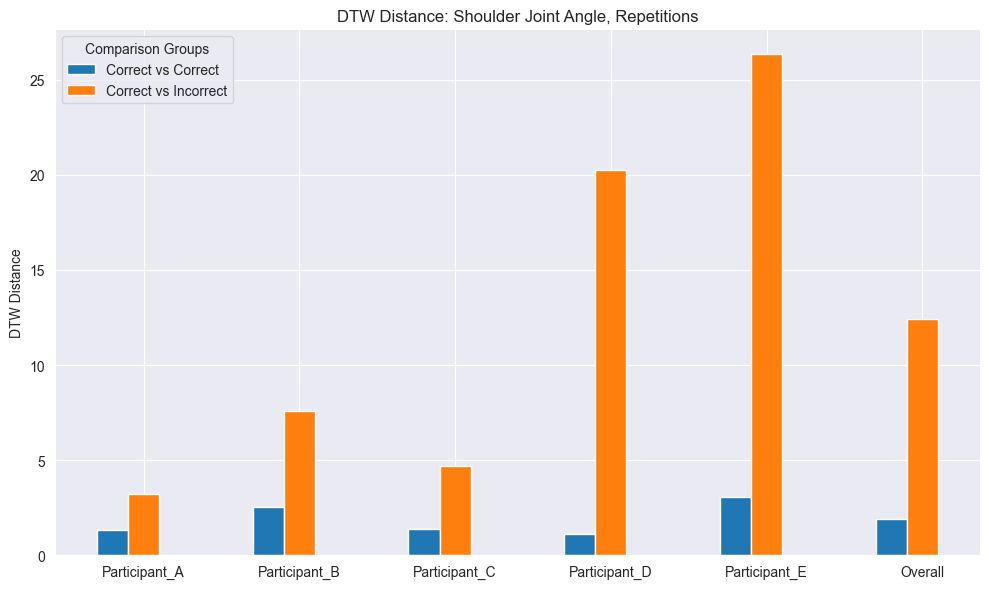

In [9]:
print("Correct vs Correct - Repetitions:")
acrom_correct_dtw = dtw_reps_joint(df_correct, "Left Shoulder Abduction/Adduction joint_angle_xzy")

print("\nCorrect vs Incorrect - Repetitions:")
acrom_incorrect_dtw = dtw_reps_joint(df_incorrect, "Left Shoulder Abduction/Adduction joint_angle_xzy",df_correct)

elbow_reps_data_2 = [
    [1.303, 3.224],   # Participant_A
    [2.539, 7.575],   # Participant_B
    [1.397, 4.714],   # Participant_C
    [1.122, 20.248],  # Participant_D
    [3.034, 26.338],  # Participant_E
]
elbow_reps_overall_avg_2 = [1.879, 12.420]  # Overall averages 

plot_grouped_bar(
    elbow_reps_data_2, elbow_reps_overall_avg_2,
    "DTW Distance: Shoulder Joint Angle, Repetitions"
)

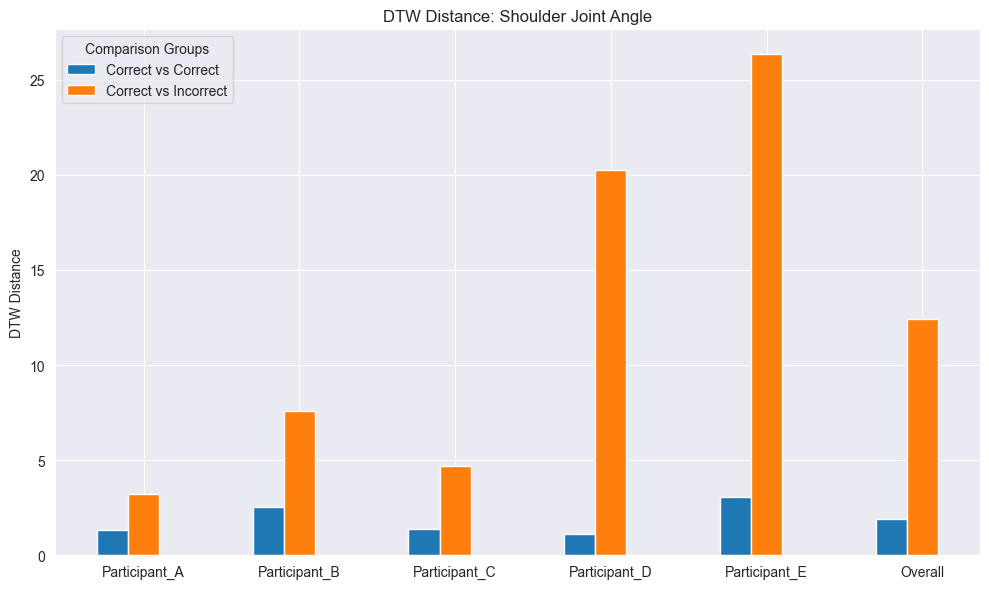

In [206]:
elbow_reps_data_2 = [
    [1.303, 3.224],   # Participant_A
    [2.539, 7.575],   # Participant_B
    [1.397, 4.714],   # Participant_C
    [1.122, 20.248],  # Participant_D
    [3.034, 26.338],  # Participant_E
]
elbow_reps_overall_avg_2 = [1.879, 12.420]  

plot_grouped_bar(
    elbow_reps_data_2, elbow_reps_overall_avg_2,
    "DTW Distance: Shoulder Joint Angle"
)

# EUC, COS, ETC

In [10]:
# Load the dataframes
df_correct = pd.read_pickle("../correct_position_scaled_df.pkl")
df_incorrect = pd.read_pickle("../incorrect_position_scaled_df.pkl")

## position data

Correct vs Correct - Repetitions:
Average EUC+DTW distance for Participant_A: 0.05380897389255891
Average EUC+0pad distance for Participant_A: 0.15762052929081155
Average COS+DTW distance for Participant_A: 0.8534342300711412
Average COS+0pad distance for Participant_A: 0.6449196962885322
Average RMSE+DTW distance for Participant_A: 0.060055951457098966
Average RMSE+0pad distance for Participant_A: 0.006442797356698889
Average EUC+DTW distance for Participant_B: 0.08950911353826892
Average EUC+0pad distance for Participant_B: 0.13965591068946656
Average COS+DTW distance for Participant_B: 0.8087856114753997
Average COS+0pad distance for Participant_B: 0.7205928710683484
Average RMSE+DTW distance for Participant_B: 0.09909086839888381
Average RMSE+0pad distance for Participant_B: 0.004816295661970068
Average EUC+DTW distance for Participant_C: 0.02489951582504634
Average EUC+0pad distance for Participant_C: 0.11401812264368648
Average COS+DTW distance for Participant_C: 0.82658806288693

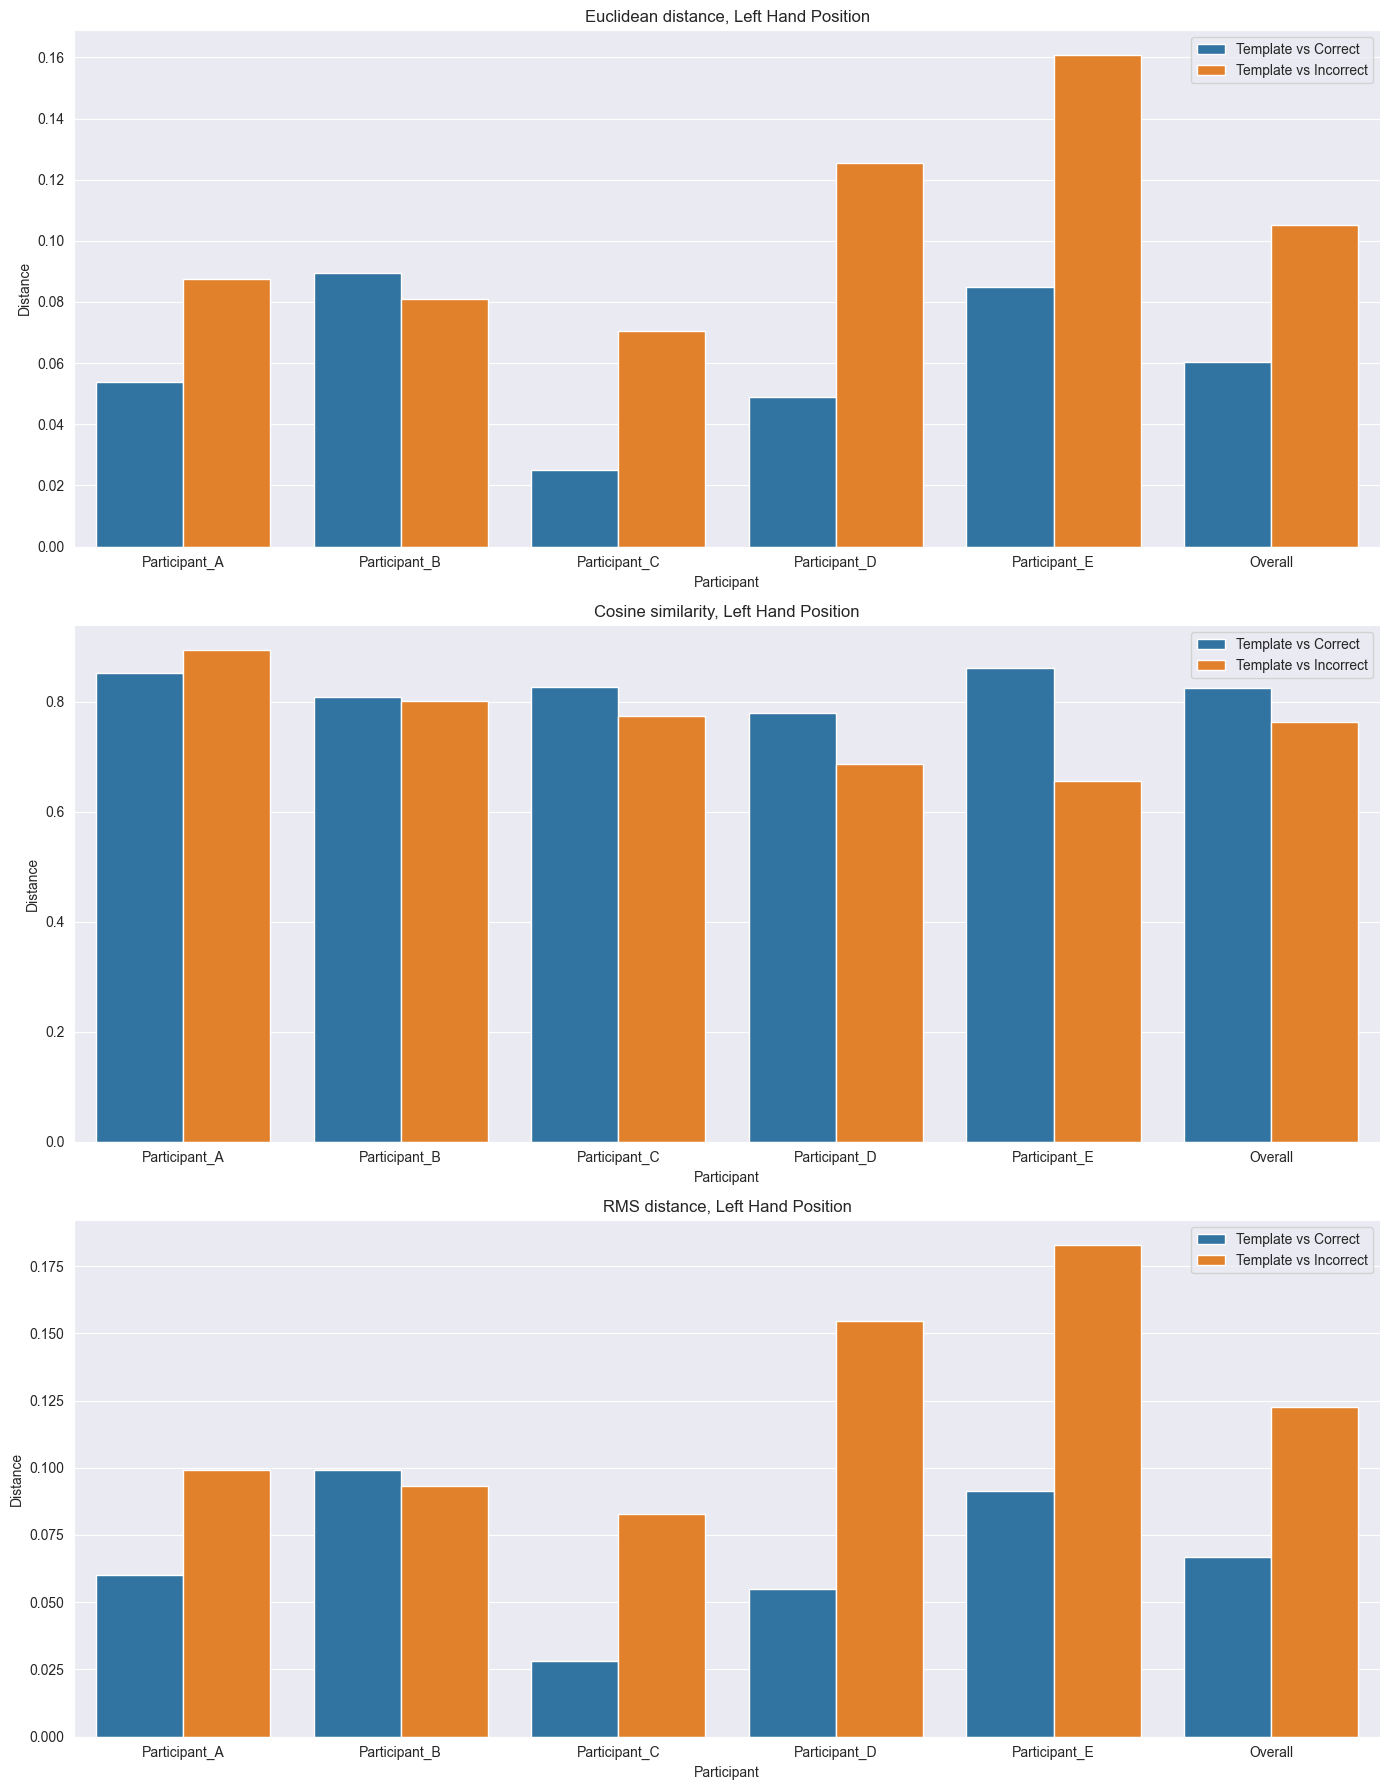

Overall Averages:
                        Metric              Condition  Distance
0    Average COS+0pad distance    Template vs Correct  0.634516
1    Average COS+0pad distance  Template vs Incorrect  0.379235
2    Average EUC+0pad distance    Template vs Correct  0.140516
3    Average EUC+0pad distance  Template vs Incorrect  0.234992
4   Average RMSE+0pad distance    Template vs Correct  0.005896
5   Average RMSE+0pad distance  Template vs Incorrect  0.009550
6            Cosine similarity    Template vs Correct  0.826081
7            Cosine similarity  Template vs Incorrect  0.762839
8           Euclidean distance    Template vs Correct  0.060353
9           Euclidean distance  Template vs Incorrect  0.105019
10                RMS distance    Template vs Correct  0.066688
11                RMS distance  Template vs Incorrect  0.122528


In [32]:
print("Correct vs Correct - Repetitions:")
cc = calc_metrics_position(df_correct)
print("\nCorrect vs Incorrect - Repetitions:")
ic = calc_metrics_position(df_incorrect, df_correct)

combined_results = pd.concat([
    cc.assign(Condition="Template vs Correct"),
    ic.assign(Condition="Template vs Incorrect"),
])

df_melted_no_0pad = combined_results.melt(
    id_vars=['Participant', 'Condition'],
    var_name='Metric',
    value_name='Distance'
)

metric_rename_map = {
    'Average EUC+DTW distance': 'Euclidean distance',
    'Average COS+DTW distance': 'Cosine similarity',
    'Average RMSE+DTW distance': 'RMS distance'
}

df_melted_no_0pad['Metric'] = df_melted_no_0pad['Metric'].replace(metric_rename_map)
df_melted_no_0pad['Distance'] = pd.to_numeric(df_melted_no_0pad['Distance'], errors='coerce')
metric_pairs_no_0pad = [
    'Euclidean distance',
    'Cosine similarity',
    'RMS distance'
]

plot_grouped_bar_overall(df_melted_no_0pad, metric_pairs_no_0pad)

## joint angles - shoulder

T8_LeftUpperArm Lateral Bending

Correct vs Correct - Repetitions:
Average EUC+DTW distance for Participant_A: 0.032636693375948725
Average EUC+0pad distance for Participant_A: 0.6443287785510854
Average COS+DTW distance for Participant_A: 0.5
Average COS+0pad distance for Participant_A: 0.42000000000000004
Average RMSE+DTW distance for Participant_A: 0.5121035551826802
Average RMSE+0pad distance for Participant_A: 0.2964190637597363
Average EUC+DTW distance for Participant_B: 0.10949220557041359
Average EUC+0pad distance for Participant_B: 0.5056492589057089
Average COS+DTW distance for Participant_B: 0.5
Average COS+0pad distance for Participant_B: 0.4582582195679424
Average RMSE+DTW distance for Participant_B: 1.7351609587367662
Average RMSE+0pad distance for Participant_B: 0.168248517043114
Average EUC+DTW distance for Participant_C: 0.055511688428561086
Average EUC+0pad distance for Participant_C: 0.9572555883646096
Average COS+DTW distance for Participant_C: 0.48316020263237536
A

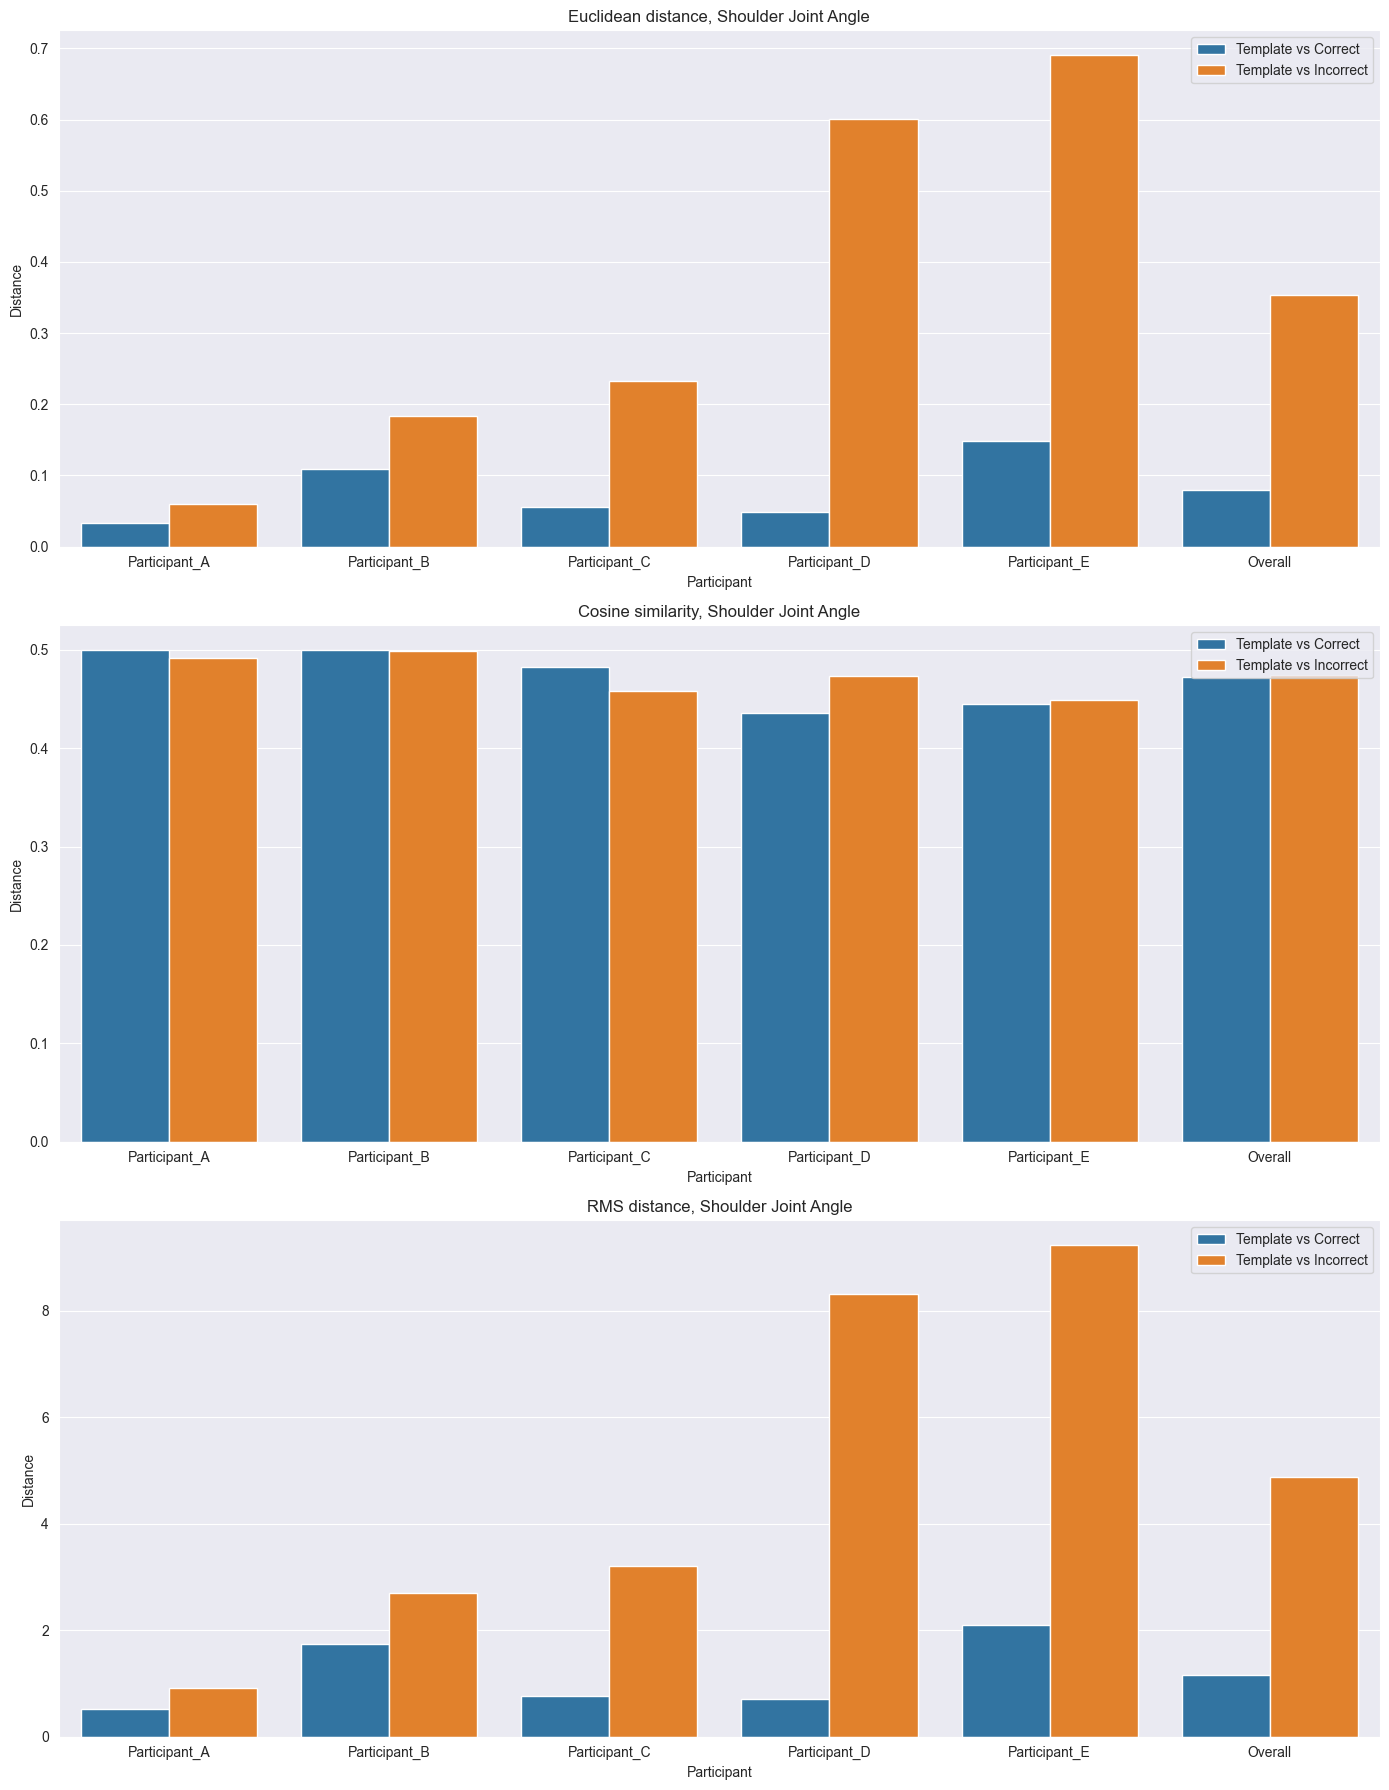

Overall Averages:
                        Metric              Condition  Distance
0    Average COS+0pad distance    Template vs Correct  0.366733
1    Average COS+0pad distance  Template vs Incorrect  0.244120
2    Average EUC+0pad distance    Template vs Correct  0.689663
3    Average EUC+0pad distance  Template vs Incorrect  1.400976
4   Average RMSE+0pad distance    Template vs Correct  0.334681
5   Average RMSE+0pad distance  Template vs Incorrect  0.599594
6            Cosine similarity    Template vs Correct  0.472791
7            Cosine similarity  Template vs Incorrect  0.474454
8           Euclidean distance    Template vs Correct  0.079186
9           Euclidean distance  Template vs Incorrect  0.353397
10                RMS distance    Template vs Correct  1.164978
11                RMS distance  Template vs Incorrect  4.873492


In [42]:
# Perform calculations for "T8_LeftUpperArm Lateral Bending"
print("T8_LeftUpperArm Lateral Bending")
print("\nCorrect vs Correct - Repetitions:")
g = calc_metrics_joint(df_correct, "T8_LeftUpperArm Lateral Bending joint_angle_zxy")
print("\nCorrect vs Incorrect - Repetitions:")
u = calc_metrics_joint(df_incorrect, "T8_LeftUpperArm Lateral Bending joint_angle_zxy", df_correct)

# Combine results and rename metrics for clarity
combined_results_joints = pd.concat([
    g.assign(Condition="Template vs Correct"),
    u.assign(Condition="Template vs Incorrect"),
])

# Melt combined results for plotting
df_melted = combined_results_joints.melt(
    id_vars=['Participant', 'Condition'],
    var_name='Metric',
    value_name='Distance'
)

# Rename metrics for clarity
metric_rename_map = {
    'Average EUC+DTW distance': 'Euclidean distance',
    'Average COS+DTW distance': 'Cosine similarity',
    'Average RMSE+DTW distance': 'RMS distance'
}

df_melted['Metric'] = df_melted['Metric'].replace(metric_rename_map)
df_melted['Distance'] = pd.to_numeric(df_melted['Distance'], errors='coerce')

# Define the metric pairs to plot
metric_pairs_no_0pad = [
    'Euclidean distance',
    'Cosine similarity',
    'RMS distance'
]

# Plot the results with the updated function including "Overall"
plot_grouped_bar_overall(df_melted, metric_pairs_no_0pad)

# OTHERS

In [45]:
df = pd.read_pickle("../correct_position_scaled_df.pkl")
df_incorrect = pd.read_pickle("../incorrect_position_scaled_df.pkl")

## regularity

### acc

In [46]:
print("correct")
res = max_peak_autocorr(df,"Left Hand z acc")
res["Correct"] = 1
print("incorrect")
ires = max_peak_autocorr(df_incorrect,"Left Hand z acc")
ires["Correct"] = 0

combined = pd.concat([res,ires])
print(combined)

# Pivot the df for plotting
df_pivot = combined.pivot(index='Participant', columns='Correct', values='Max Peak Value Average')
df_pivot.columns = ['Incorrect', 'Correct']  # Rename columns for clarity

correct
Participant: Participant_A, Max Peak Value: 0.7181075173576229, index: 170
Participant: Participant_A, Max Peak Value: 0.6334026743622926, index: 162
Participant: Participant_A, Max Peak Value: 0.759007144186482, index: 168
Participant average: 0.7035057786354658
Participant: Participant_B, Max Peak Value: 0.47777724944628674, index: 179
Participant: Participant_B, Max Peak Value: 0.47062412145489957, index: 202
Participant: Participant_B, Max Peak Value: 0.427170182394257, index: 167
Participant average: 0.4585238510984811
Participant: Participant_C, Max Peak Value: 0.6646897392250866, index: 145
Participant: Participant_C, Max Peak Value: 0.7645206959860724, index: 144
Participant: Participant_C, Max Peak Value: 0.8089542079751529, index: 141
Participant average: 0.746054881062104
Participant: Participant_D, Max Peak Value: 0.5834705242792522, index: 161
Participant: Participant_D, Max Peak Value: 0.7562039862055757, index: 161
Participant: Participant_D, Max Peak Value: 0.73

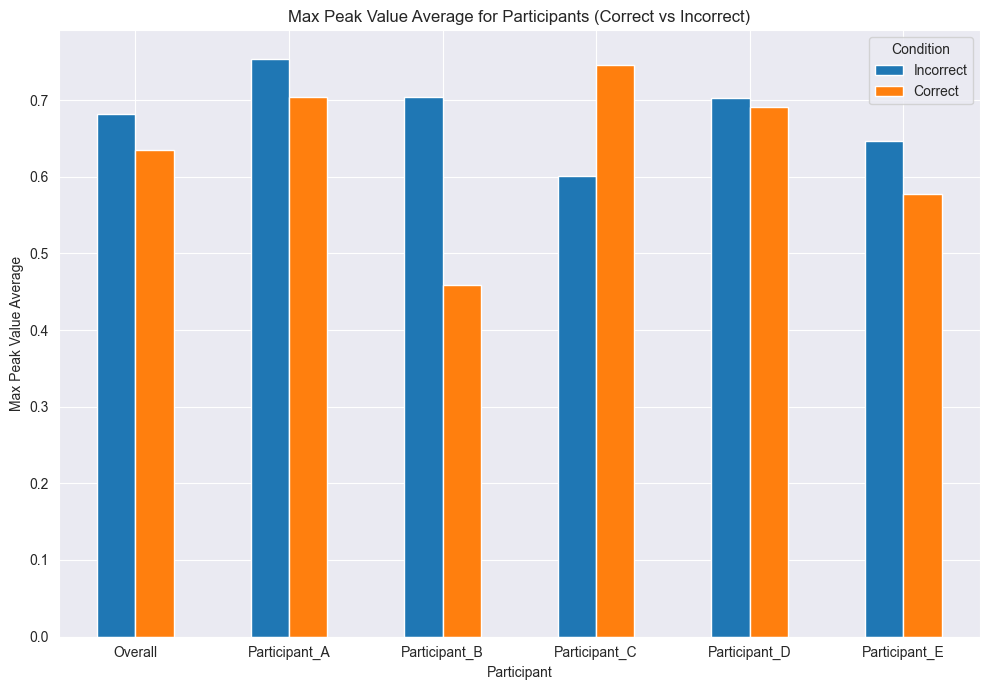


Overall Averages:
   Participant  Max Peak Value Average  Correct
10     Overall                0.681618        0
11     Overall                0.635244        1


In [47]:
overall_row = combined.groupby('Correct')['Max Peak Value Average'].mean().reset_index()
overall_row['Participant'] = 'Overall'
combined_with_overall = pd.concat([combined, overall_row], ignore_index=True)

# Pivot the df for plotting
df_pivot = combined_with_overall.pivot(index='Participant', columns='Correct', values='Max Peak Value Average')
df_pivot.columns = ['Incorrect', 'Correct'] 

df_pivot.plot(kind='bar', figsize=(10, 7))
plt.title('Max Peak Value Average for Participants (Correct vs Incorrect)')
plt.ylabel('Max Peak Value Average')
plt.xlabel('Participant')
plt.xticks(rotation=0)
plt.legend(title='Condition')
plt.tight_layout()
plt.show()


overall_averages = combined_with_overall[combined_with_overall['Participant'] == 'Overall']
print("\nOverall Averages:")
print(overall_averages)

### pos

In [48]:
print("correct")
res = max_peak_autocorr(df,"Left Hand z position")
res["Correct"] = 1
print("incorrect")
ires = max_peak_autocorr(df_incorrect,"Left Hand z position")
ires["Correct"] = 0

combined = pd.concat([res,ires])
print(combined)

correct
Participant: Participant_A, Max Peak Value: 0.8654136416984758, index: 171
Participant: Participant_A, Max Peak Value: 0.8426822676999547, index: 164
Participant: Participant_A, Max Peak Value: 0.8734533885068781, index: 168
Participant average: 0.8605164326351029
Participant: Participant_B, Max Peak Value: 0.7579318547563336, index: 185
Participant: Participant_B, Max Peak Value: 0.8367639041963671, index: 202
Participant: Participant_B, Max Peak Value: 0.7871874984876164, index: 176
Participant average: 0.793961085813439
Participant: Participant_C, Max Peak Value: 0.8261512329513092, index: 146
Participant: Participant_C, Max Peak Value: 0.851490121588053, index: 144
Participant: Participant_C, Max Peak Value: 0.8702849023323724, index: 141
Participant average: 0.8493087522905783
Participant: Participant_D, Max Peak Value: 0.7567856315358287, index: 162
Participant: Participant_D, Max Peak Value: 0.8695801775405103, index: 163
Participant: Participant_D, Max Peak Value: 0.837

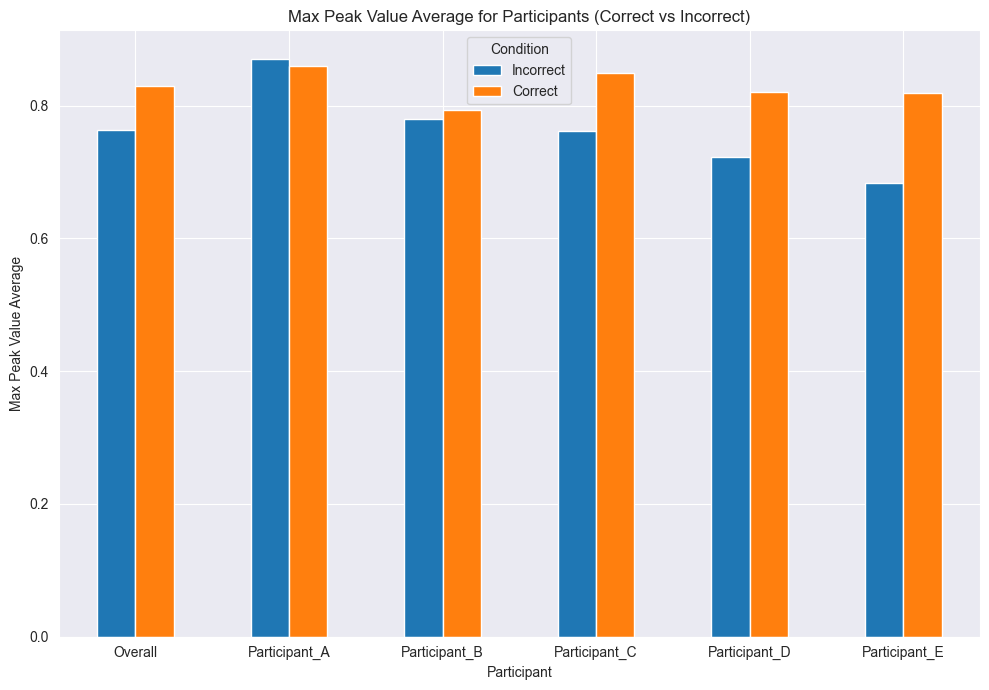


Overall Averages:
   Participant  Max Peak Value Average  Correct
10     Overall                0.763612        0
11     Overall                0.828945        1


In [49]:
overall_row = combined.groupby('Correct')['Max Peak Value Average'].mean().reset_index()
overall_row['Participant'] = 'Overall'

combined_with_overall = pd.concat([combined, overall_row], ignore_index=True)

df_pivot = combined_with_overall.pivot(index='Participant', columns='Correct', values='Max Peak Value Average')
df_pivot.columns = ['Incorrect', 'Correct']  # Rename columns for clarity

df_pivot.plot(kind='bar', figsize=(10, 7))
plt.title('Max Peak Value Average for Participants (Correct vs Incorrect)')
plt.ylabel('Max Peak Value Average')
plt.xlabel('Participant')
plt.xticks(rotation=0)
plt.legend(title='Condition')
plt.tight_layout()
plt.show()


overall_averages = combined_with_overall[combined_with_overall['Participant'] == 'Overall']
print("\nOverall Averages:")
print(overall_averages)

## smoothness

In [50]:
df_correct = pd.read_pickle("../correct_position_scaled_df.pkl")
df_incorrect = pd.read_pickle("../incorrect_position_scaled_df.pkl")

In [51]:
def calculate_smoothness_metrics(df, label_speed, label_acc):
    results = []
    label_acc_x = label_acc.replace('x', 'x').replace('y', 'x').replace('z', 'x')
    label_acc_y = label_acc.replace('x', 'y').replace('y', 'y').replace('z', 'y')
    label_acc_z = label_acc.replace('x', 'z').replace('y', 'z').replace('z', 'z')


    # Iterate through unique participants
    for participant in df["Participant"].unique():
        # Iterate through unique sets for each participant
        for set_ in df[df["Participant"] == participant]["Set"].unique():
            # Iterate through unique repetitions for each set and participant
            for repetition in df[(df["Participant"] == participant) & (df["Set"] == set_)]["Repetition"].unique():
                # Get the data for the specific participant, set, and repetition
                speed = df[(df["Participant"] == participant) & (df["Set"] == set_) & (df["Repetition"] == repetition)][
                    label_speed].to_numpy()
                acc = df[(df["Participant"] == participant) & (df["Set"] == set_) & (df["Repetition"] == repetition)][
                    label_acc].to_numpy()

                acc_x = df[(df["Participant"] == participant) & (df["Set"] == set_) & (df["Repetition"] == repetition)][
                    label_acc_x].to_numpy()
                acc_y = df[(df["Participant"] == participant) & (df["Set"] == set_) & (df["Repetition"] == repetition)][
                    label_acc_y].to_numpy()
                acc_z = df[(df["Participant"] == participant) & (df["Set"] == set_) & (df["Repetition"] == repetition)][
                    label_acc_z].to_numpy()

                # Calculate metrics
                ldl_jerk = log_dimensionless_jerk(speed, fs=60.)
                sparc_val, _, _ = sparc(speed, fs=60.)
                mi_val = movement_intensity(acc_x,acc_y, acc_z)

                results.append({
                    "Participant": participant,
                    "Set": set_,
                    "Repetition": repetition,
                    "LDLJ": ldl_jerk,
                    "SPARC": sparc_val,
                    "MI": mi_val
                })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [52]:
c_metrics = calculate_smoothness_metrics(df_correct, "Left Hand z vel", "Left Hand z acc")
c_metrics["Correct"] = 1

i_metrics = calculate_smoothness_metrics(df_incorrect, "Left Hand z vel", "Left Hand z acc")
i_metrics["Correct"] = 0

df_combined = pd.concat([c_metrics, i_metrics], ignore_index=True)

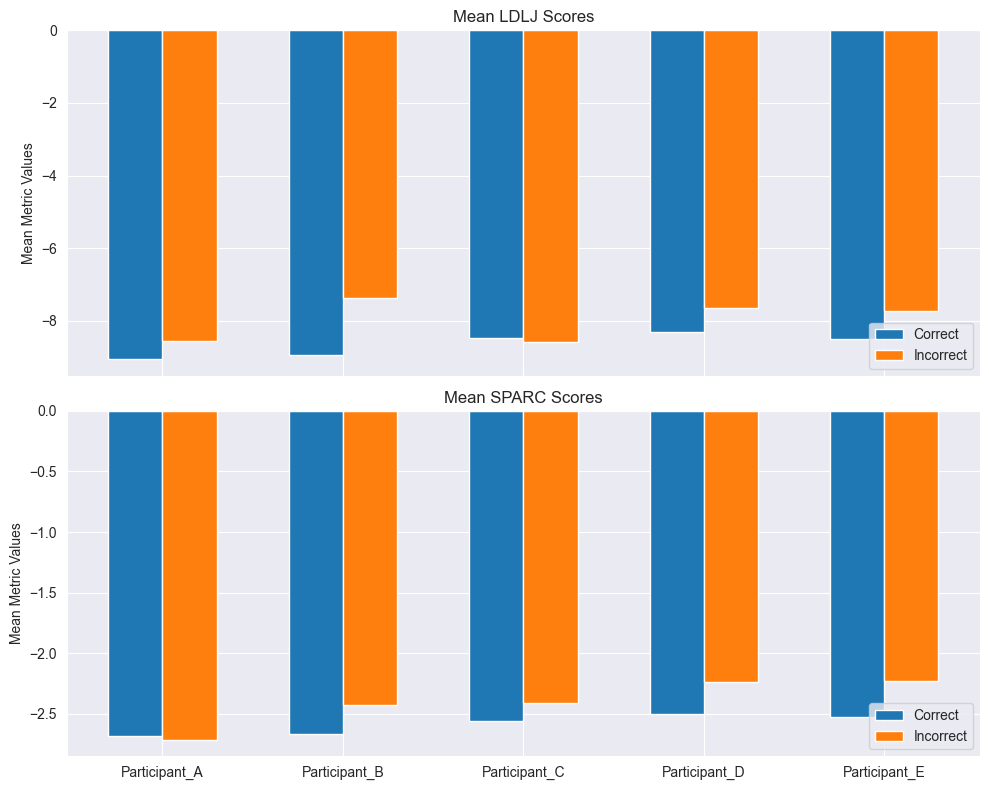

In [56]:
mean_metrics = df_combined.groupby(['Participant', 'Correct']).mean().reset_index()
participants = mean_metrics['Participant'].unique()
metrics = ['LDLJ', 'SPARC']
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 8), sharex=True)

width = 0.3 
for i, metric in enumerate(metrics):
    ax = axes[i]
    correct_means = mean_metrics[mean_metrics['Correct'] == 1][metric].values
    incorrect_means = mean_metrics[mean_metrics['Correct'] == 0][metric].values
    x = np.arange(len(participants))  # Label locations

    # Plot bars
    ax.bar(x - width / 2, correct_means, width, label='Correct')
    ax.bar(x + width / 2, incorrect_means, width, label='Incorrect')

    ax.set_ylabel('Mean Metric Values')
    ax.set_title(f'Mean {metric} Scores')
    ax.set_xticks(x)
    ax.set_xticklabels(participants)
    ax.legend()

plt.tight_layout()
plt.show()